<a href="https://colab.research.google.com/github/williamwbs/learningML/blob/master/01.Introdu%C3%A7%C3%A3o/Aprendizado%20N%C3%A3o%20Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets

## Redução de dimensionalidade

In [0]:
# Carrega dataset para tarefa de clustering
digits_dataset = datasets.load_digits(n_class=6)

In [0]:
# Extrai do dataframe as features e valor a ser predito
X = digits_dataset.data
y = digits_dataset.target

Text(0.5, 1.0, 'Exemplo do dataset de números com 64-dimensões')

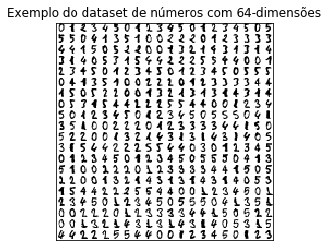

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Demonstração dos números
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('Exemplo do dataset de números com 64-dimensões')

In [0]:
# Função para visualização dos resultados
import numpy as np
from matplotlib import offsetbox
import matplotlib.pyplot as plt

def plot_digits(X):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    shown_images = np.array([[1., 1.]])
    for i in range(X.shape[0]):
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            continue
        shown_images = np.r_[shown_images, [X[i]]]
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits_dataset.images[i],
                                  cmap=plt.cm.gray_r),
            X[i])
        ax.add_artist(imagebox)

Escolha pelo menos dois métodos de aprendizado para redução de dimensionalidade: https://scikit-learn.org/stable/unsupervised_learning.html

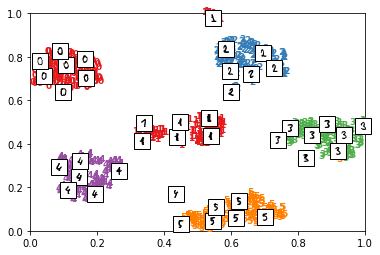

In [11]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2)
X2 = model.fit_transform(X)

plot_digits(X2)

plt.show()